In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
from plots import *

%matplotlib inline

%reload_ext autoreload
%autoreload 2

c:\Users\Bruker\anaconda3\envs\4D_CT\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
rotation_rate = 21 # degrees per second
avg_frames = 12 # Number of frames to average over
frames_per_sec = 5 # 1/seconds # Correct?



In [4]:
def V3_revolution(nproj, rr, avgf, fps, add_on=5 ):
    """
    Calculates scan time of one revolution with GoldenRatioV3
    nproj: number of projections
    rr: rotation rate in degrees per second
    avgf: number of frames to average over
    fps: frames per second
    add_on: number of seconds to add on to the scan time
    """

    exposure = nproj * avgf/fps
    rot = 360/rr
    scan_time = exposure + rot + add_on

    exposure_ratio = exposure/scan_time
    return scan_time, exposure_ratio


In [60]:
choose_formatter(incscape=False)


def plot_temp_resolution(nprojs, scan_times, exp_ratios, title= "Golden Ratio V3 Sampling", markers= []):
    """
    Plots the temporal resolution of the scan
    nprojs: number of projections
    scan_time: scan time in seconds
    """
    fig, ax = plt.subplots()

    ax1 = ax.twinx()
    left, = ax.plot(nprojs, scan_times, "-.", color = "#1F449C", label= "Temporal Resolution")
    right, = ax1.plot(nprojs, exp_ratios, ":", color = "#F05039", label= "Exposure Ratio")


    ax.set_xlabel('Projections per Revolution')
    # ax.set_xticks(nprojs)
    # ax.set_xticklabels([str(int(n)) for n in nprojs])
    ax.set_ylabel('Temporal Resolution (s)', color = left.get_color())
    ax1.set_ylabel('Exposure Ratio', color = right.get_color())

    ax.tick_params(axis='y', colors=left.get_color())
    ax1.tick_params(axis='y', colors=right.get_color())

    # plt.legend(handles=[left, right])

    if markers != []:
        mark_plot(markers, ax, ax1, scan_times, exp_ratios, nprojs)
        

    plt.title(title)
    plt.savefig(f"../Results/Golden Angle/temporal_resolution_{title}.pdf", format="pdf") # Save figure, locate Results folder
    plt.show()

def mark_plot(markers, ax, ax1, scan_times, exp_ratios, nprojs):

    for m in markers:
            try:
                arg = np.argwhere(np.isclose(nprojs, [m], rtol=1e-2))[0][0]
                r = scan_times[arg]
                e = exp_ratios[arg]
                # ax.axvline(m, color = "black", linestyle = "--")
                ax.scatter(m, r, color = "black", marker = "o")
                ax.text(m+2, r-15, f"{m}: {round(r, 1)}s {round(e*100,1)}\%", rotation=0, verticalalignment='bottom')
            except:
                print(f"Marker {m} not found in nprojs. Excluded from plot")
                pass
            finally:
                 continue
    return



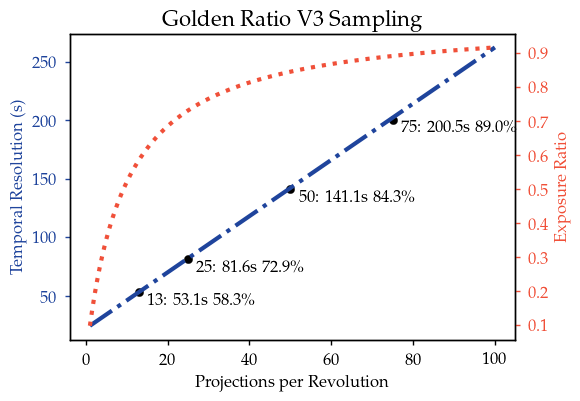

In [62]:
nprojs = np.linspace(1, 100, 1000)
times, ratios = V3_revolution(nprojs, rotation_rate, avg_frames, frames_per_sec)
markers = [13, 25, 50, 75]
plot_temp_resolution(nprojs, times, ratios, markers=markers)